In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [92]:
df = pd.read_csv('Loan_Data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [93]:
df.drop(columns=['Loan_ID','Property_Area'],inplace=True) 
# i dont think both of these columns play an role in paying off loan

In [94]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y


In [95]:
df.shape

(614, 11)

In [96]:
columns_obj=df.loc[:,(df.dtypes=='object')]
for col in columns_obj:
    print(col, df[col].unique())

Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes' nan]
Loan_Status ['Y' 'N']


In [97]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [98]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Loan_Status           object
dtype: object

In [99]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64

In [100]:
df_sub = (df[df["Dependents"].isnull()])
df_sub

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Y
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Y
120,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Y
226,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,N
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Y
293,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,N
301,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Y
332,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Y
335,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Y
346,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,N


In [101]:
index_NoDepndent = df_sub[df_sub['Married'] == 'Yes'].index
np.array(index_NoDepndent)

array([102, 120, 226, 301, 335, 346, 517, 571], dtype=int64)

In [102]:
index_MarriedNo = df_sub[df_sub['Married'] == 'No'].index
np.array(index_MarriedNo)

array([293, 332, 355, 597], dtype=int64)

In [103]:
#if they are married then there is atlease one dependent mostly
df.loc[index_NoDepndent,'Dependents'] = 1
df.loc[index_MarriedNo,'Dependents'] = 0

In [104]:
(df[df["Dependents"].isnull()])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Y
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Y
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Y


In [105]:
print(len(df[df["LoanAmount"].isnull()]))
(df[df["LoanAmount"].isnull()])

22


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y
35,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Y
63,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,N
81,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Y
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,N
102,Male,Yes,1,Graduate,No,13650,0.0,NaN,360.0,1.0,Y
103,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Y
113,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Y
127,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Y
202,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,N


In [106]:
df1 = df[pd.notnull(df['LoanAmount'])]
df1.shape
#dropping the rows having LoanAmount having Nan Values

(592, 11)

In [107]:
(df1[df1["Dependents"].isnull()])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Y
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Y


# sns.barplot(x='Married',y='CoapplicantIncome',data=df1)

In [108]:
df1.groupby('Married').agg({'CoapplicantIncome':'sum'})

,CoapplicantIncome
Married,
No,276700.000000
Yes,694984.919989


In [109]:
df1.loc[[104],['Dependents','Married']] = [1,'Yes']
df1.loc[[228],['Dependents','Married']] = [0,'No']
#I cam see Two records where Dependents in NaN,So i use CoapplicntIncome to decide married and dependent status

In [110]:
df1.isnull().sum()

Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Loan_Status           0
dtype: int64

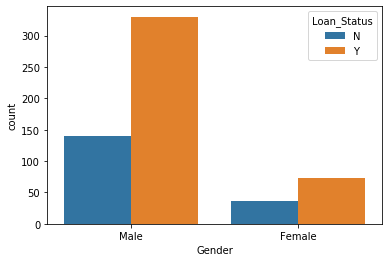

In [111]:
sns.countplot(x='Gender',hue='Loan_Status',data=df1)

In [112]:
df1.drop(columns=['Gender'],inplace=True,axis=1)
#I dont think gender will play a key role in payoff loan status,

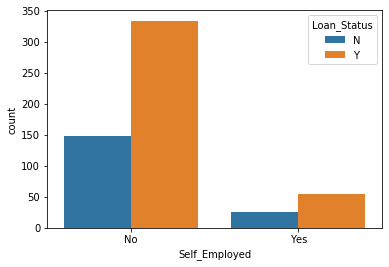

In [113]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df1)

In [114]:
df1['Self_Employed'].value_counts()

No     482
Yes     79
Name: Self_Employed, dtype: int64

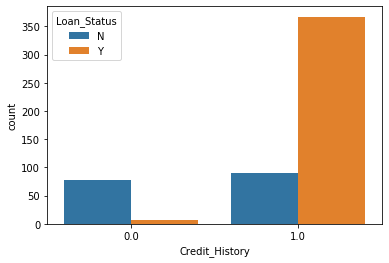

In [115]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df1)

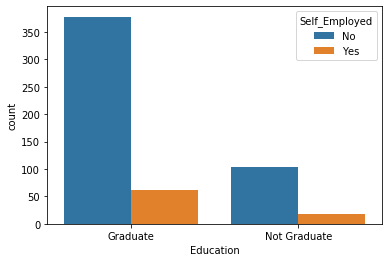

In [116]:
sns.countplot(x='Education',hue='Self_Employed',data=df1)

In [117]:
(df1[df1["Loan_Amount_Term"].isnull()])

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
19,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Y
36,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,N
44,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Y
45,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Y
73,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,N
112,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,N
165,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Y
197,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Y
223,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Y
232,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Y


In [118]:
df1['Loan_Amount_Term'].mean()

342.1453287197232

In [119]:
df1['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [120]:
df1['Loan_Amount_Term'].median()

360.0

In [121]:
#Since for loan term mean and median are same , so i ll udate Nan Loan term with 360
df1['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [122]:
df1.isnull().sum()

Married               0
Dependents            0
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       49
Loan_Status           0
dtype: int64

In [123]:
df_sub2 = (df1[df1["Credit_History"].isnull()])
df_sub2.groupby('Loan_Status').agg({
    'ApplicantIncome':'mean','CoapplicantIncome':'mean','LoanAmount':'mean'
})

,ApplicantIncome,CoapplicantIncome,LoanAmount
Loan_Status,,,
N,4410.083333,5390.583333,182.000000
Y,4728.405405,1826.621622,154.297297


In [124]:
df1[df1['Credit_History'] == 1]['Loan_Status'].value_counts()

Y    367
N     91
Name: Loan_Status, dtype: int64

In [125]:
df1[df1['Credit_History'] == 0]['Loan_Status'].value_counts()

N    78
Y     7
Name: Loan_Status, dtype: int64

In [126]:
#based on above query , we can say Those who are with credit history 1 is repaying loan more , 
#those with zero are defaulting more
index_yes = df_sub2[df_sub2['Loan_Status']=='Y'].index
index_No = df_sub2[df_sub2['Loan_Status']=='N'].index
index_yes = np.array(index_yes)
index_No = np.array(index_No)
df1.loc[index_yes,['Credit_History']] = [1]
df1.loc[index_No,['Credit_History']] = [0]

In [127]:
df1.isnull().sum()

Married               0
Dependents            0
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Loan_Status           0
dtype: int64

In [128]:
df2 = df1[pd.notnull(df1['Self_Employed'])]
df2.shape
#dropping the rows having Self_Employed having Nan Values

(561, 10)

In [129]:
df2.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y
5,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y


In [130]:
df2.isnull().sum()

Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64

In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Married'] = le.fit_transform(df2['Married'])
df2.head()
df2['Education'] = le.fit_transform(df2['Education'])
df2.head()
df2['Self_Employed'] = le.fit_transform(df2['Self_Employed'])
df2.head()
df2['Loan_Status'] = le.fit_transform(df2['Loan_Status'])
df2.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,0,0,1,3000,0.0,66.0,360.0,1.0,1
3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1
4,0,0,0,0,6000,0.0,141.0,360.0,1.0,1
5,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1


In [132]:
df2['Self_Employed'].unique()

array([0, 1], dtype=int64)

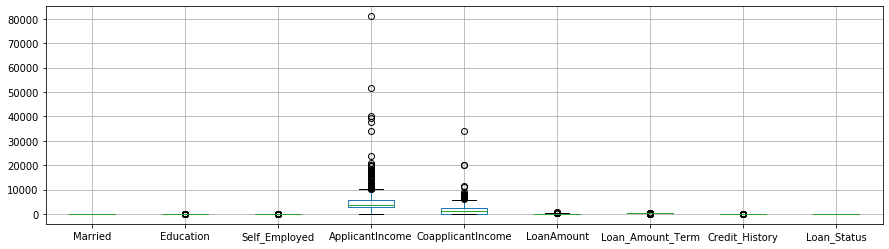

In [133]:
plt.figure(figsize=(15,4))
df2.boxplot()

In [134]:
df2.describe()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,0.654189,0.215686,0.140820,5380.582888,1587.520356,146.008913,342.887701,0.836007,0.691622
std,0.476056,0.411665,0.348146,5806.734836,2518.860592,84.981016,64.937909,0.370600,0.462236
min,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2889.000000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,3833.000000,1167.000000,128.000000,360.000000,1.000000,1.000000
75%,1.000000,0.000000,0.000000,5818.000000,2283.000000,170.000000,360.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,81000.000000,33837.000000,700.000000,480.000000,1.000000,1.000000


#there is huge difference between max and 75 percent value of applicant Income and Co-applicantIncome

In [135]:
df2.skew()

Married             -0.650094
Education            1.386230
Self_Employed        2.070769
ApplicantIncome      6.535057
CoapplicantIncome    5.707228
LoanAmount           2.712532
Loan_Amount_Term    -2.417391
Credit_History      -1.819804
Loan_Status         -0.832076
dtype: float64

In [136]:
index_3moredependents = (df2[df2['Dependents'] == '3+']).index
np.array(index_3moredependents)
df2.loc[index_3moredependents,'Dependents'] = [4] # lets consider 3+ dependents to 100.

In [137]:
df2.Dependents.unique()

array(['1', '0', '2', 4, 1, 0], dtype=object)

In [138]:
df2.dtypes

Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Loan_Status            int32
dtype: object

In [139]:
df2.skew()

Married             -0.650094
Dependents           1.433278
Education            1.386230
Self_Employed        2.070769
ApplicantIncome      6.535057
CoapplicantIncome    5.707228
LoanAmount           2.712532
Loan_Amount_Term    -2.417391
Credit_History      -1.819804
Loan_Status         -0.832076
dtype: float64

In [140]:
df3 = df2.copy()
columns = ['ApplicantIncome' ,'CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for col in columns:
    if df3.skew().loc[col]>0.55:
        df3[col]=np.sqrt(df3[col])
df3.skew()

Married             -0.650094
Dependents           1.433278
Education            1.386230
Self_Employed        2.070769
ApplicantIncome      2.851714
CoapplicantIncome    0.731400
LoanAmount           1.289312
Loan_Amount_Term    -2.417391
Credit_History      -1.819804
Loan_Status         -0.832076
dtype: float64

In [141]:
df3.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,1,1,0,0,67.697858,38.832976,11.313708,360.0,1.0,0
2,1,0,0,1,54.772256,0.000000,8.124038,360.0,1.0,1
3,1,0,1,0,50.823223,48.559242,10.954451,360.0,1.0,1
4,0,0,0,0,77.459667,0.000000,11.874342,360.0,1.0,1
5,1,2,0,1,73.600272,64.776539,16.340135,360.0,1.0,1


In [142]:
df3.dtypes

Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Loan_Status            int32
dtype: object

In [143]:
df3["Dependents"] = df3["Dependents"].astype(str).astype(float)

In [144]:
from scipy.stats import zscore
z_score = abs(zscore(df3))
print('Original Shape',df3.shape)
df3 = df3.loc[(z_score<3).all(axis=1)]
print('Reduced shape',df3.shape)

Original Shape (561, 10)
Reduced shape (529, 10)


In [145]:
df3.skew()

Married             -0.632072
Dependents           1.469509
Education            1.334258
Self_Employed        2.152203
ApplicantIncome      1.197141
CoapplicantIncome    0.253109
LoanAmount           0.420036
Loan_Amount_Term    -2.048446
Credit_History      -1.778771
Loan_Status         -0.843136
dtype: float64

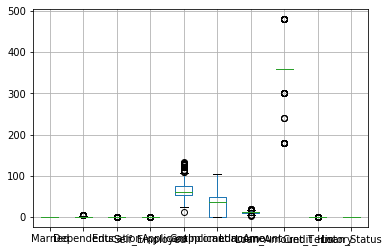

In [146]:
df3.boxplot()

In [147]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report


In [148]:
def getscore_metrics(prediction,actual):
    print("accuracy_score:",accuracy_score(prediction,actual))
    print("precision_score:",precision_score(prediction,actual))
    print("recall_score:",recall_score(prediction,actual))
    print("f1_score:",f1_score(prediction,actual))
    print("confusion_matrix:",confusion_matrix(y_test, pred))
    print("roc_auc_score:",roc_auc_score(actual,prediction))


In [149]:
X = df3.drop(columns=['Loan_Status'])
y= df3['Loan_Status']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [151]:
model=LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
model.score(X_test,y_test)
getscore_metrics(pred,y_test)

accuracy_score: 0.8514285714285714
precision_score: 0.9921259842519685
recall_score: 0.8344370860927153
f1_score: 0.9064748201438849
confusion_matrix: [[ 23  25]
 [  1 126]]
roc_auc_score: 0.7356463254593175


In [152]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.48      0.64        48\n           1       0.83      0.99      0.91       127\n\n    accuracy                           0.85       175\n   macro avg       0.90      0.74      0.77       175\nweighted avg       0.87      0.85      0.83       175\n'

In [153]:
def parsemodel(model,X,y,X_test,y_test):
    model.fit(X,y)
    pred = model.predict(X_test)
    model.score(X_test,y_test)
    getscore_metrics(pred,y_test)

In [154]:
from sklearn.model_selection import GridSearchCV
def Gridsearchvc(clf,params,cv,X,y):
    return_value=''
    clf = GridSearchCV(clf, params, cv=cv)
    clf.fit(X,y)
    return clf.best_params_ ,clf.best_score_

In [155]:
y_test.value_counts()

1    127
0     48
Name: Loan_Status, dtype: int64

In [156]:
print("cross_val_score:",cross_val_score(LogisticRegression(),X,y,cv=5,scoring='accuracy').mean())#(LogisticRegression,X,y)
parsemodel(LogisticRegression(),X_train,y_train,X_test,y_test)

cross_val_score: 0.8393890386343216
accuracy_score: 0.8514285714285714
precision_score: 0.9921259842519685
recall_score: 0.8344370860927153
f1_score: 0.9064748201438849
confusion_matrix: [[ 23  25]
 [  1 126]]
roc_auc_score: 0.7356463254593175


In [157]:
from sklearn.neighbors import KNeighborsClassifier
print("cross_val_score:",cross_val_score(KNeighborsClassifier(n_neighbors=50),X,y,cv=5,scoring='accuracy').mean())
parsemodel(KNeighborsClassifier(n_neighbors=50),X_train,y_train,X_test,y_test)

cross_val_score: 0.6918778077268642
accuracy_score: 0.7314285714285714
precision_score: 1.0
recall_score: 0.7298850574712644
f1_score: 0.8438538205980066
confusion_matrix: [[ 23  25]
 [  1 126]]
roc_auc_score: 0.5104166666666667


In [158]:
from sklearn.tree import DecisionTreeClassifier
print("cross_val_score:",cross_val_score(DecisionTreeClassifier(min_samples_split=50),X,y,cv=5,scoring='accuracy').mean())
parsemodel(DecisionTreeClassifier(min_samples_split=50),X_train,y_train,X_test,y_test)

cross_val_score: 0.8167115902964961
accuracy_score: 0.7942857142857143
precision_score: 0.889763779527559
recall_score: 0.837037037037037
f1_score: 0.8625954198473282
confusion_matrix: [[ 23  25]
 [  1 126]]
roc_auc_score: 0.7157152230971129


In [159]:
from sklearn.svm import SVC
print("cross_val_score:",cross_val_score(SVC(),X,y,cv=5,scoring='accuracy').mean())
parsemodel(SVC(),X_train,y_train,X_test,y_test)

cross_val_score: 0.6937646001796945
accuracy_score: 0.7257142857142858
precision_score: 1.0
recall_score: 0.7257142857142858
f1_score: 0.8410596026490067
confusion_matrix: [[ 23  25]
 [  1 126]]
roc_auc_score: 0.5


In [160]:
from sklearn.naive_bayes import GaussianNB
print("cross_val_score:",cross_val_score(GaussianNB(),X,y,cv=5,scoring='accuracy').mean())
gnb = parsemodel(GaussianNB(),X_train,y_train,X_test,y_test)

cross_val_score: 0.8336747529200359
accuracy_score: 0.8514285714285714
precision_score: 0.9921259842519685
recall_score: 0.8344370860927153
f1_score: 0.9064748201438849
confusion_matrix: [[ 23  25]
 [  1 126]]
roc_auc_score: 0.7356463254593175


In [161]:
params={'C':[1.0,2.0,3.0,4.0],"tol":[0.0001,0.0015,0.0025,0.0002],'multi_class':['ovr','multinomial']}
Gridsearchvc(fin_model,params,5,X,y)
fin_model = LogisticRegression(C=1.0, multi_class='ovr',tol=0.0001)
fin_model.fit(X,y)
fin_model.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [162]:
import pickle
file_name='Loan_model.pkl'
pickle.dump(fin_model,open(file_name,'wb'))

final_model = pickle.load(open(file_name,'rb'))
pred = final_model.predict(X_test)
print(accuracy_score(y_test,pred))

0.8514285714285714
